# Investigation of Fandango Movie Ratings

## 1. Introduction

In 2015 a data journalist *Walt Hickey* analyzed movie ratings data from **Fandango Online Movie Rating Forum** and found that the rating system was biased and dishonest. Fandango displays a 5-star rating system on their website, where minimum rating is *0* and maximum is *5* stars. 

Hicky found out that the movie ratings are generally *high* or *very high*. There is no rating under 2 stars. This resulted in the distribution of displayed ratings shifted to the right compared to the actual rating distribution.
Hicky published his article at *FiveThirtyEight* website. Here is the __[LINK](https://fivethirtyeight.com/features/fandango-movies-ratings/)__ 

Fandango's officials replied that the bias was caused by a bug in the system and promised to fix it. But the actual rating value is not available anymore.

**Our objective in this project is to analyze the movie ratings data to determine if Fandango has updated their rating system or not.**

## 2. Comprehending the Data

The best way to understand if there has been a change in Fandango's rating system after Hickey's analysis is to compare the system's characteristics before and after the analysis. For this purpose we have a ready-made data of both these periods. 

 1. Walt Hickey's analyzed data, which is available on __[GitHub](https://github.com/fivethirtyeight/data/tree/master/fandango)__ 
 2. Ratings data for movies released in *2016* and *2017*, which is available on __[GitHub](https://github.com/mircealex/Movie_ratings_2016_17)__
 
Here we will use the second data to analyze the rating system's characteristics and compare it with Hickey's analysis.

In [1]:
#import essential modules
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#First we will explore Hickey's data
Hickey_data = pd.read_csv('fandango_score_comparison.csv')
Hickey_data

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.30,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.00,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.50,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.40,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5
5,The Water Diviner (2015),63,62,50,6.8,7.2,4.5,4.0,3.15,3.10,...,3.60,3.0,3.0,2.5,3.5,3.5,34,39373,397,0.5
6,Irrational Man (2015),42,53,53,7.6,6.9,4.0,3.5,2.10,2.65,...,3.45,2.0,2.5,2.5,4.0,3.5,17,2680,252,0.5
7,Top Five (2014),86,64,81,6.8,6.5,4.0,3.5,4.30,3.20,...,3.25,4.5,3.0,4.0,3.5,3.5,124,16876,3223,0.5
8,Shaun the Sheep Movie (2015),99,82,81,8.8,7.4,4.5,4.0,4.95,4.10,...,3.70,5.0,4.0,4.0,4.5,3.5,62,12227,896,0.5
9,Love & Mercy (2015),89,87,80,8.5,7.8,4.5,4.0,4.45,4.35,...,3.90,4.5,4.5,4.0,4.5,4.0,54,5367,864,0.5


In [2]:
Hickey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
FILM                          146 non-null object
RottenTomatoes                146 non-null int64
RottenTomatoes_User           146 non-null int64
Metacritic                    146 non-null int64
Metacritic_User               146 non-null float64
IMDB                          146 non-null float64
Fandango_Stars                146 non-null float64
Fandango_Ratingvalue          146 non-null float64
RT_norm                       146 non-null float64
RT_user_norm                  146 non-null float64
Metacritic_norm               146 non-null float64
Metacritic_user_nom           146 non-null float64
IMDB_norm                     146 non-null float64
RT_norm_round                 146 non-null float64
RT_user_norm_round            146 non-null float64
Metacritic_norm_round         146 non-null float64
Metacritic_user_norm_round    146 non-null float64
IMDB_norm_round               146 n

Hickey's data has a total of *146* rows and *22* columns. These include

 * Movie and the year of release. 
 * Movie Ratings by different Movie-Rating Forums.
 * It has Fandango Stars, Fandango Ratings (actual ratings by the viewers), Fandango Votes and Fandango Differences. 

In [3]:
#Below we will explore the second dataset
rating_1617 = pd.read_csv('movie_ratings_16_17.csv')
rating_1617.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [4]:
rating_1617.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 15 columns):
movie           214 non-null object
year            214 non-null int64
metascore       214 non-null int64
imdb            214 non-null float64
tmeter          214 non-null int64
audience        214 non-null int64
fandango        214 non-null float64
n_metascore     214 non-null float64
n_imdb          214 non-null float64
n_tmeter        214 non-null float64
n_audience      214 non-null float64
nr_metascore    214 non-null float64
nr_imdb         214 non-null float64
nr_tmeter       214 non-null float64
nr_audience     214 non-null float64
dtypes: float64(10), int64(4), object(1)
memory usage: 25.2+ KB


The above data has *214 rows* and *15 columns*. The data contains

 * Movie name
 * Year of release
 * Ratings from various movie forums
 * Fandango stars 
 
Further we will only select the columns which are required for our analysis among both the data sets and rename the datasets.

In [5]:
selected_Hickey = Hickey_data.loc[:,["FILM", "Fandango_Stars", "Fandango_Ratingvalue", "Fandango_votes", "Fandango_Difference"]]
selected_Hickey

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5
5,The Water Diviner (2015),4.5,4.0,397,0.5
6,Irrational Man (2015),4.0,3.5,252,0.5
7,Top Five (2014),4.0,3.5,3223,0.5
8,Shaun the Sheep Movie (2015),4.5,4.0,896,0.5
9,Love & Mercy (2015),4.5,4.0,864,0.5


In [6]:
selected_rating = rating_1617.loc[:, ["movie","year","fandango"]]
selected_rating

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0
6,A Street Cat Named Bob,2016,4.5
7,Alice Through the Looking Glass,2016,4.0
8,Allied,2016,4.0
9,Amateur Night,2016,3.5


*The population of interest for our goal is* **`Fandango movie ratings of movies released after Hickey's analysis i.e. after Aug 2015`.**

- Hickey's data contains film ratings from various rating forums (Rotten Tomatoes rating, RT User rating, Metacritic score, Metacritic User score, and IMDb score) and at least 30 fan reviews on Fandango, released in the year 2015. The sample has *146* rows and *22* columns.  
 
    `Hickey's data contains movies with no less than 30 fan reviews. Meaning movies with less than 30 fan reviews are not included in the dataset. This also means all the movies released in 2015 are not in the dataset. This implies that the sampling is not random and biased with only *146* popular movies released in 2015.` 
    
 
- Data collected in the year 2016 and 2017, are from four popular movie rating forums *IMDB*, *Fandango*, *Rotten Tomatoes* and *Metacritic*. This dataset has *214* entries and *15* columns. The listed movies are most voted and reviewed in the year 2016 and 2017.
 
   `In this dataset only movies with most votes and reviews are included. It contains only 214 movies of all the movies released in 2016 and 2017. This means the sampling is not random and biased as all the movies have not got the equal chance to be included in the dataset.`
  
**Each year on an average *~ 700* hollywood movies are released (before the pandemic). Above numbers are way too lower than the actual movies released. So we conclude that both the above samples do not represent the population of interest.**

## 3. Changing the Goal of the Analysis

With the dataset which is not random and which does not represent our population of interest, we are left with two alternatives:-

 1. Collect the new data
 2. Changing the goal of our analysis by setting some limitations
 
Collecting the new data can be cumbersome. So we would proceed with the same data by modifying our goal. 

Our new goal will still be a proxy of initial goal, that is **if there has been any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016**.

## 4. Isolating the Required Samples

With the new goal we have two population of interest that we would 
like to describe and compare with each other:-

 - Fandango's ratings for popular movies released in 2015
 - Fandango's ratings for popular movies released in 2016
 
Here the term `popular` is not precise. We will use Hickey's criterea and consider a movie popular if it has **30 fan ratings or more**.

In [7]:
Hickey_pop = selected_Hickey[selected_Hickey["Fandango_votes"] >= 30].reset_index(drop=True)
Hickey_pop

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5
5,The Water Diviner (2015),4.5,4.0,397,0.5
6,Irrational Man (2015),4.0,3.5,252,0.5
7,Top Five (2014),4.0,3.5,3223,0.5
8,Shaun the Sheep Movie (2015),4.5,4.0,896,0.5
9,Love & Mercy (2015),4.5,4.0,864,0.5


There are exactly same number of rows (i.e. 146) like earlier which implies that movies chosen for analysis by Hickey have atleast 30 reviews. Below we will add a new column called *Year* potraying the year in which the movie was released. Further we will only consider the movies released in the year *2015* and drop others.

In [8]:
Hickey_pop["Date"] = Hickey_pop["FILM"].str.extract(r"(201[4,5])")
Hickey_pop

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning:

currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)



,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Date
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015
5,The Water Diviner (2015),4.5,4.0,397,0.5,2015
6,Irrational Man (2015),4.0,3.5,252,0.5,2015
7,Top Five (2014),4.0,3.5,3223,0.5,2014
8,Shaun the Sheep Movie (2015),4.5,4.0,896,0.5,2015
9,Love & Mercy (2015),4.5,4.0,864,0.5,2015


In [9]:
Hickey_pop_15 = Hickey_pop[Hickey_pop["Date"]=="2015"].reset_index(drop=True)
Hickey_pop_15

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Date
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015
5,The Water Diviner (2015),4.5,4.0,397,0.5,2015
6,Irrational Man (2015),4.0,3.5,252,0.5,2015
7,Shaun the Sheep Movie (2015),4.5,4.0,896,0.5,2015
8,Love & Mercy (2015),4.5,4.0,864,0.5,2015
9,Far From The Madding Crowd (2015),4.5,4.0,804,0.5,2015


In the end, we are left with *129* rows from `Hickey's data on popular movies of 2015`. 

Next we will look at the second dataset. In this dataset there is no column with number of reviews for the movies and finding the number of reviews for individual movies can be time consuming. Hence we will believe author's comment in his article on GitHub that he has collected ratings for some of the most voted and reviewed movies of 2016 and 2017. 

Below we will only consider the movies released in the year 2016 for our analysis. 

In [10]:
selected_rating_16 = selected_rating[selected_rating["year"]==2016].reset_index(drop=True)
selected_rating_16

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Hologram for the King,2016,3.0
4,A Monster Calls,2016,4.0
5,A Street Cat Named Bob,2016,4.5
6,Alice Through the Looking Glass,2016,4.0
7,Allied,2016,4.0
8,Amateur Night,2016,3.5
9,Anthropoid,2016,4.0


In here we are left with *191* rows for our analysis.

## 5. Comparing the Data With Kernel Density Plots

Next we are going to generate `kernel density plots` for both the samples in the same figure in order to understand the movie ratings distribution. Our objective in here is to make a high-level comparison between the shapes of the distributions. 

([<matplotlib.axis.XTick at 0x7fecbb53c160>,
 <a list of 11 Text xticklabel objects>)

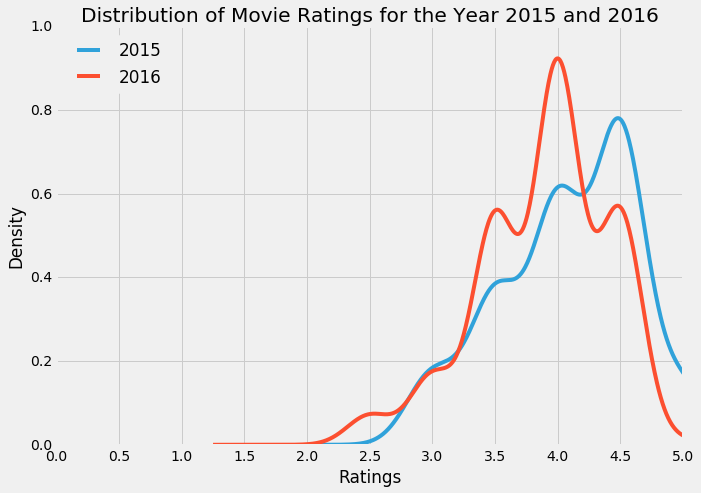

In [11]:
#generating the plot for comparison purposes
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 7))
Hickey_pop_15['Fandango_Stars'].plot.kde(label='2015')
selected_rating_16['fandango'].plot.kde(label='2016')
plt.legend(loc='upper left')
plt.title("Distribution of Movie Ratings for the Year 2015 and 2016")
plt.xlabel("Ratings")
plt.xlim(0,5)
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5,5.0])

**We make following observations from the above graph:-**

 * Distribution for the year *2015* is clearly *left skewed* and the distribution for the year *2016* is *less left skewed* compared to the year *2015*. This depicts that the ratings of movies released in *2015* slightly higher than that of in *2016*. 
 * The density of distribution is higher for *2016* compared to *2015* as there are more number of movies in the sample for the year *2016*.
 * Average rating for the movies released in *2016* is lower i.e. *4 stars* compared to movies released in *2015* which is higher, i.e. *4.5* stars. 
 
 
Above observations lead to the inference that there is a difference in the popular movie ratings released in the year *2015* and *2016*.  

## 6. Comparing the Relative Frequencies

Kernel Density Plots are useful in understanding absolute frequency distributions. But here as our samples vary in quantity (total number of movies), better technique would be to calculate *relative frequencies* and compare them. We believe relative frequency comparision with percentages has better readability than with proportions. 

Further, we will calculate the relative frequencies in percentages for both the samples and compare them.

In [12]:
#calculating relative frequency for Hickey's data
table_15 = round(Hickey_pop_15["Fandango_Stars"].value_counts(normalize=True)*100,2)
Rel_freq_15 = pd.DataFrame(table_15)
Rel_freq_15

,Fandango_Stars
4.5,37.98
4.0,28.68
3.5,17.83
3.0,8.53
5.0,6.98


In [13]:
#calculating relative frequency for 2016 data
table_16 = round(selected_rating_16["fandango"].value_counts(normalize=True)*100,2)
Rel_freq_16 = pd.DataFrame(table_16)
Rel_freq_16

,fandango
4.0,40.31
4.5,24.61
3.5,24.08
3.0,7.33
2.5,3.14
5.0,0.52


Additionally, we will concat the two tables in order to compare the relative frequency distributions.

In [14]:
relative_freq = pd.concat([Rel_freq_16, Rel_freq_15], axis=1)
relative_freq = relative_freq.rename(columns={'fandango':'Fandango_16','Fandango_Stars':'Fandango_15'})
relative_freq

,Fandango_16,Fandango_15
2.5,3.14,NaN
3.0,7.33,8.53
3.5,24.08,17.83
4.0,40.31,28.68
4.5,24.61,37.98
5.0,0.52,6.98


From the above table, the difference in the distribution is more plain. 

 - Popular movies released in *2015* do not have *2.5* ratings whereas popular movies released in *2016* have *2.5 star* ratings. 
 - The mean of the distribution is at *4.5 stars* for the movies released in *2015*, whereas it is *4 stars* in *2016*. 
 - In *2015* movies with *5 star* rating is around *7%*, where as in *2016* it is only *0.5%*.
 - The direction of distribution appears *left skewed* for the movies released in *2015* than for movies released in *2016*. But this difference is not as obvious as KDE plots.

## 7. Determining the Direction of the Difference

In order to determine the direction of the difference, we will calculate the *summary statistics* for both the samples. We will compute the *Mean*, *Median* and *Mode* for each sample seperately and compare these to find out the direction of the difference.

In [15]:
#Calculating the Mean,Median and Mode for both the samples

Mean_15 = Hickey_pop_15["Fandango_Stars"].mean()
Median_15 = Hickey_pop_15["Fandango_Stars"].median()
Mode_15 = Hickey_pop_15["Fandango_Stars"].mode()
Movies_2015 = [round(Mean_15,2), Median_15, Mode_15[0]]
M_2015 = pd.Series(Movies_2015) 

Mean_16 = selected_rating_16["fandango"].mean()
Median_16 = selected_rating_16["fandango"].median()
Mode_16 = selected_rating_16["fandango"].mode()
Movies_2016 = [round(Mean_16,2), Median_16, Mode_16[0]]
M_2016 = pd.Series(Movies_2016)

statistics = pd.concat([M_2015,M_2016], axis=1)
statistics = statistics.rename(columns={0:'2015',1:'2016'})
statistics.index = ['Mean', 'Median', 'Mode']
statistics


,2015,2016
Mean,4.09,3.89
Median,4.00,4.00
Mode,4.50,4.00


**Looking at the Mean, Median and Mode from the above table we deduce the following results:-**

 - The direction of the distribution is clearly more left skewed for the movies released in *2015* than for movies released in *2016*. This implies that the movies released in the year *2015* have higher ratings than those released in *2016*. 
 - The magnitude of difference is pretty small between them. Mean and Mode for the movies released in the year *2015* are slightly higher by *0.2* and *0.5* respectively than those in the year *2016* and Median is the same for both.

Further, we will generate a grouped bar plot to visualize the difference between the *Mean*, *Median* and *Mode* for the popular movies released in the year *2015* and *2016*.  

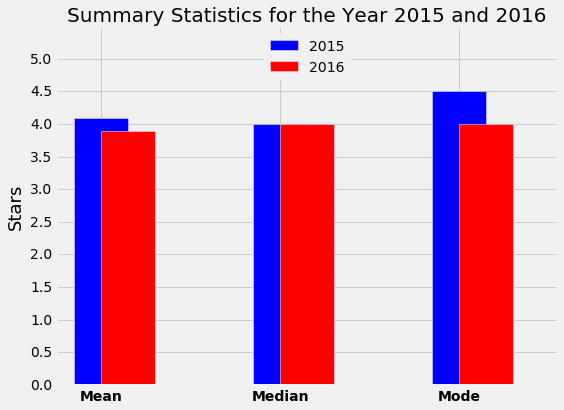

In [16]:
plt.style.use('fivethirtyeight')
statistics['2015'].plot.bar(color = 'blue',align='center', label='2015', width=0.3,figsize=(8,6))
statistics['2016'].plot.bar(color='red', align='edge', width=0.3, label='2016')
# statistics.plot.bar(figsize=(8, 6))
plt.title("Summary Statistics for the Year 2015 and 2016", size=20)
plt.ylim(0, 5.5)
plt.yticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5,5.0],size=14)
plt.ylabel('Stars', size=18)
plt.xticks(rotation=360, weight='bold', size=14)
plt.legend(loc='upper center', fontsize='medium')

Above figure shows the difference among the three metrics for the two samples. Here *Median* is same for the two samples, while both *Mean* and *Mode* are higher for the movies released in the year *2015* impliying movies released in the year *2015* are higly rated compared to the movies released in the year *2016*.

## Conclusions

The main objective of the project was to determine if *Fandango* has updated it's movie rating system after Hickey's analysis. As we did not have sufficient number of samples for our analysis, we had to change our objective. 

Our modified objective was **If there has been any difference between Fandango's ratings for popular movies released in 2015 and Fandango's ratings for popular movies released in 2016.**

Our analysis led to the following conclusions:-

 1. There is a positive shift in Fandango's rating system from the year *2015* to *2016*. This inference is due to the following reasons
   - Movie rating begins at *3* stars in *2015* and at *2.5* stars in *2016*.
   - There is a reduction in the average rating value from the year *2015* to *2016*. 
   - Direction of the difference is more left skewed for the year *2015* than for *2016* indicating lower ratings for the movies released in the year *2016*. 
   
 2. We think that after Hickey's analysis, Fandango has either fixed the bug in the system as they have earlier stated or they have changed the rating stratergy i.e. by not rating the movies high/very high.
